4 0 [0]
4 1 [1, 2, 4, 8]
4 2 [3, 5, 6, 9, 10, 12]
4 3 [7, 11, 13, 14]
4 4 [15]
Dim= 16
Basis:
[0, 1, 2, 4, 8, 3, 5, 6, 9, 10, 12, 7, 11, 13, 14, 15]
[1, 4, 6, 4, 1]
[0.75]
[-0.95710678 -0.25        0.45710678  0.75      ]
[-1.6160254  -0.95710678 -0.25        0.1160254   0.45710678  0.75      ]
[-0.95710678 -0.25        0.45710678  0.75      ]
[0.75]
0  Sz=  0.0  E=  -1.6160254037844384
1  Sz=  -0.9999999999999997  E=  -0.9571067811865472
2  Sz=  0.9999999999999997  E=  -0.9571067811865472
3  Sz=  0.0  E=  -0.9571067811865476
4  Sz=  -0.9999999999999999  E=  -0.24999999999999994
5  Sz=  0.9999999999999999  E=  -0.24999999999999994
6  Sz=  0.0  E=  -0.25
7  Sz=  0.0  E=  0.11602540378443858
8  Sz=  0.0  E=  0.45710678118654763
9  Sz=  -1.0000000000000002  E=  0.4571067811865476
10  Sz=  1.0000000000000002  E=  0.4571067811865476
11  Sz=  -2.0  E=  0.75
12  Sz=  0.0  E=  0.75
13  Sz=  2.0  E=  0.75
14  Sz=  -0.9999999999999994  E=  0.7499999999999997
15  Sz=  0.9999999999999994  E=  0.74

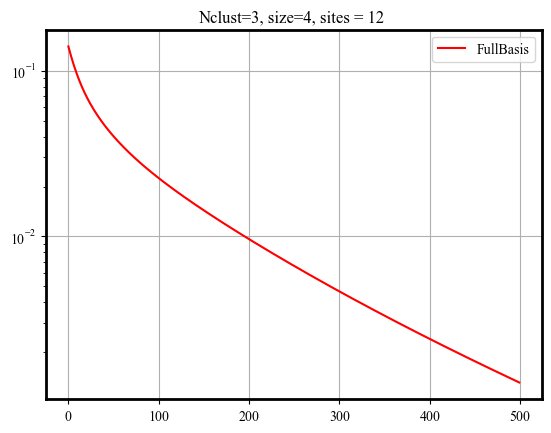

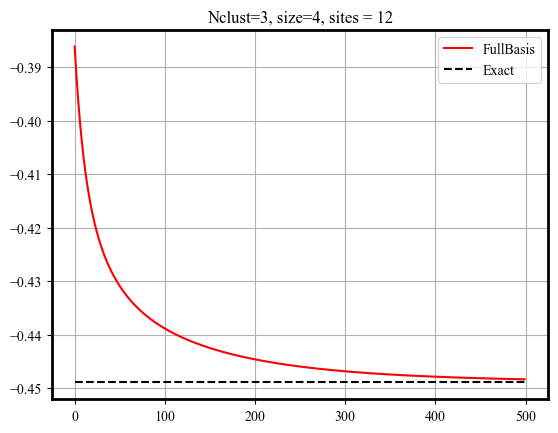

In [2]:
import matplotlib.pyplot as pyplot
import numpy as np
pyplot.rcParams['axes.linewidth'] = 2 #set the value globally
pyplot.rcParams['image.aspect'] = 0.7
pyplot.rcParams['legend.numpoints'] = 1
pyplot.rcParams['legend.scatterpoints'] = 1
pyplot.rcParams["font.family"] = "Times New Roman"
pyplot.rcParams["mathtext.default"] = "it"
pyplot.rcParams['mathtext.fontset'] = 'cm'
pyplot.rcParams['text.usetex'] = False
#pyplot.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command
from matplotlib import cm, ticker, colors

import numpy as np
from matplotlib import pyplot as pl

from CC3 import bits
from CC3 import diagrams
from CC3 import tableaux
from CC3 import vmc
from CC3 import model
from CC3 import wf

save = 0
N=3 # number of clusters
L0=4 # size of cluster

# E0 = -0.45638667611714656 # for 8 sites total
E0 = -0.44894924312043477 # for 12 sites total

hami = model.Heisenberg(N,L0,True,-1)

new_ops = hami.new_ops
new_ops = np.asarray(new_ops)
   
Eloc = new_ops[0]
Sz = new_ops[-1]
P = new_ops[-2]

def get_rel_E(EE, E0):
    EE = np.array(EE)
    return (EE - E0) / abs(E0)


if 1:
    update_hami = model.Heisenberg(N,L0,True,-1,True)
    system = vmc.CC(hami,hami,min(N,10),3)
    basis = hami.full_basis()
    print(len(basis))
    # print(f'{basis = }')
    
    np.random.seed(0)
    #t1_aux = np.copy(t1)
    #t2_aux = np.copy(t2)
    #t1 = np.zeros((hami.N,hami.dim))
    t2 = np.zeros((hami.N,hami.N,hami.dim,hami.dim))
    t3 = np.zeros((hami.N,hami.N,hami.N,hami.dim,hami.dim,hami.dim))
    
    #t1[0,:] = t1_aux[0,:] 
    #t1[1,:] = t1_aux[0,:] 
    #t1[2,:] = t1_aux[0,:] 
    #t1[3,:] = t1_aux[0,:]
    
    
    t1 = np.random.rand(hami.N,hami.dim)
    t2 = np.random.rand(hami.N,hami.N,hami.dim,hami.dim)
    t1[:,:] = 0.1
    t2[:,:,:,:] = 0 #0.1
    t3[:,:,:,:,:,:] = 0.
    #print(t1)
    
    for i in range(hami.dim):
        for j in range(i+1,hami.dim):
            t2[:,:,i,j] = t2[:,:,j,i]

eps = 0.01
energies = []
#t1[:] = 1.
# from CC3 import model_custom

t1_0 = t1.copy()
t2_0 = t2.copy()
t3_0 = t3.copy()



import time
t0 = time.time()

if 1:
    basis = system.model.full_basis()
    
    for iter in range(500):
        # E,Hdpsi,Hdpsi3,dpsi,dpsi3 = vmc.exact_sum(system,t1,t2,t3)

        
        E,Hdpsi,Hdpsi2, Hdpsi3,dpsi,dpsi2, dpsi3 = \
            vmc.exact_sum(system, basis,
                                   t1,
                                   t2,
                                   t3)
        # E,Hdpsi, Hdpsi3,dpsi, dpsi3 = \
        #     vmc.exact_sum(system, basis,
        #                            t1,
        #                            t2,
        #                            t3)
        print("Iter ",iter,E/system.L0/system.N)

        derivs = Hdpsi - E*dpsi
        derivs2 = Hdpsi2 - E*dpsi2
        derivs3 = Hdpsi3 - E*dpsi3

        # for i in range(hami.N):
        #     for n in range(hami.dim):
        #         t1[i,n] -= eps*derivs[i,i,n,n]
        #         for j in range(hami.N):
        #             for m in range(hami.dim):
        #                 t2[i,j,n,m] -= eps*derivs[i,j,n,m]
        #                 for l in range(hami.dim):
        #                     t3[0,i,j,n,m,l] -= eps*derivs3[0,i,j,n,m,l]
        for i in range(hami.N):
            for n in range(hami.dim):
                t1[i,n] -= eps*derivs[i,n]
                for j in range(hami.N):
                    for m in range(hami.dim):
                        t2[i,j,n,m] -= eps*derivs2[i,j,n,m]
                        for l in range(hami.dim):
                            t3[0,i,j,n,m,l] -= eps*derivs3[0,i,j,n,m,l]
                        

        energies += [E/system.L0/system.N]
        print(system.state)
        print("========================================")
    
    if save:
        np.savetxt(f"data/EE_N={N}_L0={L0}.txt", energies)
                
    t = time.time() - t0
    print(f'Time taken for optimization: {t:.2f} seconds')

    print(f'{t1.shape = }')
    print(f'{t2.shape = }')
    print(f'{t3.shape = }')

    print(f'{derivs.shape = }')
    # print(f'{derivs2.shape = }')
    print(f'{derivs3.shape = }')

    # print(f'{t1 = }')
    # print(f'prod(t1.shape) = {np.prod(t1.shape)}')
    # print(f'prod(t2.shape) = {np.prod(t2.shape)}')


    t1diff = t1 - t1_0
    t2diff = t2 - t2_0
    # print(f'{t1diff = }')
    # print(f'{t2diff = }')
    t3diff = t3 - t3_0
    # t3diff = t3diff.detach().numpy()

    print("Number of nonzero elements in t1diff:", np.count_nonzero(t1diff))
    print("Number of nonzero elements in t2diff:", np.count_nonzero(t2diff))
    print("Number of nonzero elements in t3diff:", np.count_nonzero(t3diff))

    x1 = np.arange(len(energies))
    pl.figure()
    pl.plot(x1, get_rel_E(energies,E0), label='FullBasis', color='red')
    pl.title(f'Nclust={N}, size={L0}, sites = {N*L0} ')
    pl.yscale('log')
    pl.grid()
    pl.legend()
    pl.show()


    pl.figure()
    pl.plot(x1, energies, label='FullBasis', color='red')
    pl.title(f'Nclust={N}, size={L0}, sites = {N*L0}')
    pl.hlines(E0, 0, len(x1), color='black', linestyle='--', label='Exact')
    pl.grid()
    pl.legend()
    pl.show()
